In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df = pd.read_csv('https://github.com/wichai-t/instruction_media/raw/master/Python%20for%20prediction/example/data/bus_traveling_data.csv')
df.head()

,t_bc,t_bc_ff,t_bc_extp,t_ab,link_progress,speed,sms_ab,exponential_decayed_speed,two_gps_space_mean_speed,six_gps_space_mean_speed,eighteen_gps_space_mean_speed,thirty_gps_space_mean_speed,sixty_gps_space_mean_speed,ninety_gps_space_mean_speed,BC_distance_in_meter_by_linear_ref
0,20,29,0.0,0,0.089130,33,33.000000,31.886683,33.1104,27.4518,25.6430,21.7842,12.6122,8.4081,224.063441
1,10,17,11.0,10,0.494944,32,43.830200,31.915012,34.1690,27.8687,27.4193,22.4323,13.1760,8.7840,124.237845
2,30,60,768.0,10,0.012866,16,1.139332,21.727783,8.6832,21.2578,25.2992,18.9315,11.1607,7.4404,242.823587
3,20,42,47.0,20,0.302005,30,13.372144,23.795837,24.6647,19.2013,25.8253,19.6032,11.5677,7.7118,171.698711
4,10,18,13.0,30,0.713728,35,21.068264,26.596878,34.7717,18.9430,26.4936,20.5449,12.1415,8.0943,70.419530


In [7]:
train_df = df.iloc[:round(len(df)*.7)]
test_df = df.iloc[round(len(df)*.7)+1:]

In [8]:
# divide each into X and y
X_train = train_df.ix[:, train_df.columns != 't_bc']
y_train = train_df.t_bc

X_test = test_df.ix[:, test_df.columns != 't_bc']
y_test = test_df.t_bc

C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [9]:
# fit the model
est = sm.OLS(y_train, X_train).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   t_bc   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     44.90
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           8.33e-46
Time:                        20:27:59   Log-Likelihood:                -428.75
No. Observations:                 169   AIC:                             885.5
Df Residuals:                     155   BIC:                             929.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
t_bc_ff                               -0.0805      0.034     -2.353      0.020      -0.148      -0.013
t_bc_extp                              0.0092      0.003      3.203      0.002       0.004       0.015
t_ab                                  -0.1989      0.074     -2.691      0.008      -0.345      -0.053
link_progress                         19.8033      5.962      3.322      0.001       8.027      31.580
speed                                 -0.5949      0.100     -5.951      0.000      -0.792      -0.397
sms_ab                                -0.0945      0.056     -1.694      0.092      -0.205       0.016
exponential_decayed_speed              0.2421      0.254      0.952      0.342      -0.260       0.744
two_gps_space_mean_speed               0.2982      0.099      3.011      0.003       0.103       0.494
six_gps_space_mean_speed              -0.2033      0.170     -1.194      0.234      -0.540       0.133
eighteen_gps_space_mean_speed          0.0881      0.203      0.435      0.665      -0.313       0.489
thirty_gps_space_mean_speed            0.1179      0.234      0.504      0.615      -0.344       0.580
sixty_gps_space_mean_speed            -0.4567      0.371     -1.230      0.220      -1.190       0.277
ninety_gps_space_mean_speed            0.0102      0.254      0.040      0.968      -0.491       0.511
BC_distance_in_meter_by_linear_ref     0.1524      0.020      7.702      0.000       0.113       0.191
==============================================================================
Omnibus:                       32.340   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.106
Skew:                           0.975   Prob(JB):                     2.94e-12
Kurtosis:                       4.933   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predict

In [10]:
y_predict = est.predict(X_test)

## Evaluate

In [11]:
mae = np.mean([abs(true-predict) for true,predict in zip(y_test, y_predict)])
rmse = sqrt(mean_squared_error(y_test, y_predict))
mape = np.mean([abs(true-predict)/true for true,predict in zip(y_test, y_predict)])*100

print('Mean absolute error (MAE): \t\t%.2f sec' % mae)      #ผิดประมาณ
print('Root mean square error (RMSE): \t\t%.2f sec' % rmse)          #
print('Mean absolute percentage error (MAPE): \t%.2f %%' % mape)        #ทำนายผิดไปประมาณ

Mean absolute error (MAE): 		2.82 sec
Root mean square error (RMSE): 		3.46 sec
Mean absolute percentage error (MAPE): 	20.67 %


In [15]:
from sklearn.metrics import accuracy_score

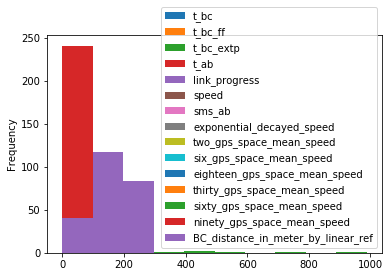

In [29]:
df.plot.hist();

In [33]:
accuracy_score('y_train','y_test')

ValueError: Found input variables with inconsistent numbers of samples: [7, 6]